`PAIR PROGRAMMING I`

 Para todas los ejercicios de pair programming de EDA I y II usaremos el dataframe generado en el ejercicio de Pandas VII.


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import sidetable

Objetivos
Los objetivos de hoy son:
Haced una exploración inicial del dataframe:
¿Cuál es el número de filas y columnas?


In [3]:
#Reading the csv file and storing it in a dataframe called df.
df = pd.read_csv("../Datos/attacks_pandas7.csv")
df.head(2) 

,Case Number,Year,Type,Country,Area,Location,Activity,Name,Age,Time,Species,Href,Siglo,Unnamed: 0_x,Sex,Species,href,Unnamed: 0_y,Injury,Mes,fatal_bien,genero_bien
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo - XXI,NaN,NaN,NaN,NaN,0,"No injury to occupant, outrigger canoe and pad...",Jun,N,F
1,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo - XXI,NaN,NaN,NaN,NaN,6,FATAL,Jun,Y,M


In [4]:
#Returning the number of rows and columns in the dataframe.
df.shape

(1672, 22)

¿Cuál es el porcentaje de valores nulos en cada columna? Presenta los resultados en un dataframe, donde las columnas sean el nombre de las variables y el porcentaje de nulos.


In [5]:
df_nulos= pd.DataFrame(df.isnull().sum() * 100 / df.shape[0])
df_nulos

,0
Case Number,0.000000
Year,0.000000
Type,0.000000
Country,0.598086
Area,2.751196
Location,3.050239
Activity,1.854067
Name,0.538278
Age,9.210526
Time,9.569378


¿Qué tipos de datos hay en cada columna?


In [6]:
df.dtypes

Case Number      object
Year            float64
Type             object
Country          object
Area             object
Location         object
Activity         object
Name             object
Age              object
Time             object
Species          object
Href             object
Siglo            object
Unnamed: 0_x    float64
Sex              object
Species          object
href             object
Unnamed: 0_y      int64
Injury           object
Mes              object
fatal_bien       object
genero_bien      object
dtype: object

Extraed la información general del dataframe.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Case Number   1672 non-null   object 
 1   Year          1672 non-null   float64
 2   Type          1672 non-null   object 
 3   Country       1662 non-null   object 
 4   Area          1626 non-null   object 
 5   Location      1621 non-null   object 
 6   Activity      1641 non-null   object 
 7   Name          1663 non-null   object 
 8   Age           1518 non-null   object 
 9   Time          1512 non-null   object 
 10  Species       1502 non-null   object 
 11  Href          1502 non-null   object 
 12  Siglo         1502 non-null   object 
 13  Unnamed: 0_x  170 non-null    float64
 14  Sex           156 non-null    object 
 15  Species       44 non-null     object 
 16  href          170 non-null    object 
 17  Unnamed: 0_y  1672 non-null   int64  
 18  Injury        1664 non-null 

2.Cread dos dataframes nuevos, uno que incluya solo las variables categóricas y otro que incluya solo las variables numéricas.


In [8]:
categoricas = df.select_dtypes(include = "object")
categoricas.head(2)

,Case Number,Type,Country,Area,Location,Activity,Name,Age,Time,Species,Href,Siglo,Sex,Species,href,Injury,Mes,fatal_bien,genero_bien
0,2018.06.25,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo - XXI,NaN,NaN,NaN,"No injury to occupant, outrigger canoe and pad...",Jun,N,F
1,2018.06.03.a,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo - XXI,NaN,NaN,NaN,FATAL,Jun,Y,M


In [9]:
numericas = df.select_dtypes(include = "number")
numericas.head(2)

,Year,Unnamed: 0_x,Unnamed: 0_y
0,2018.0,NaN,0
1,2018.0,NaN,6


¿Cuáles son los principales estádisticos de los dataframes?


In [10]:
categoricas.describe().T

,count,unique,top,freq
Case Number,1672,1672,2018.06.25,1
Type,1672,6,Unprovoked,1432
Country,1662,95,USA,741
Area,1626,236,Florida,346
Location,1621,1310,"New Smyrna Beach, Volusia County",73
Activity,1641,404,Surfing,426
Name,1663,1536,male,97
Age,1518,94,19,70
Time,1512,248,11h00,74
Species,1502,834,White shark,74


In [11]:
numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1672.0,1832.688397,528.969901,0.0,1964.00,1997.0,2008.00,2018.0
Unnamed: 0_x,170.0,6216.500000,49.218899,6132.0,6174.25,6216.5,6258.75,6301.0
Unnamed: 0_y,1672.0,2574.174043,1756.622536,0.0,1218.25,2210.0,3687.50,6285.0


Extraed los valores únicos su frecuencia. BONUS presenta los resultados en un dataframe. Os deberá quedar algo como esto:

Donde variable es cada una de las variables categóricas que tenemos en el dataset y n_unicos es una lista con los nombres de los valores únicos de cada variable.


In [12]:

for col in categoricas.columns:
    print(f'en la columna {col} tenemos los siguentes valores unicos')
    print('-----------')
    print((df[col].unique()))

en la columna Case Number tenemos los siguentes valores unicos
-----------
['2018.06.25' '2018.06.03.a' '2018.05.26.b' ... 'ND.0003' 'ND.0002'
 'ND.0001']
en la columna Type tenemos los siguentes valores unicos
-----------
['Boating' 'Unprovoked' 'Provoked' 'Invalid' 'Sea Disaster' 'Boat']
en la columna Country tenemos los siguentes valores unicos
-----------
['USA' 'BRAZIL' 'AUSTRALIA' 'ENGLAND' 'COSTA RICA' 'MALDIVES'
 'SOUTH AFRICA' 'CUBA' 'SPAIN' 'BAHAMAS' 'INDONESIA' 'EGYPT' 'NEW ZEALAND'
 'FRENCH POLYNESIA' 'NEW CALEDONIA' 'ECUADOR' 'THAILAND' 'REUNION'
 'MEXICO' 'JAMAICA' 'ITALY' 'PAPUA NEW GUINEA' 'RUSSIA' 'SEYCHELLES'
 'VIETNAM' 'GUAM' 'MOZAMBIQUE' 'SCOTLAND' 'UNITED KINGDOM' 'TAIWAN'
 'CROATIA' 'FIJI' 'TONGA' 'ST. MAARTIN' 'GRAND CAYMAN' 'VANUATU'
 'VENEZUELA' 'TURKS & CAICOS' 'OKINAWA' 'MARSHALL ISLANDS' 'MAURITIUS'
 'HONG KONG' 'JAPAN' 'SOUTH KOREA' 'ISRAEL' 'MICRONESIA' 'COLUMBIA'
 'NEW BRITAIN' 'PALAU' 'SOLOMON ISLANDS' 'FEDERATED STATES OF MICRONESIA'
 'GREECE' 'BRITISH 

Conclusiones
De qué nos sirven estos números y dataframe? Extraed conclusiones de ellos.
Por ejemplo:

`¿Hay alguna columna que no tenga sentido su tipo de datos?`


La columna year es de tipo float y deberia de ser integer.
La columna 'age' deberia de ser integer pero como tiene anotaciones de tipo smtring es un object. (deberia de limpiarse)

`¿Hay alguna columna que no tenga sentido su nombre?`

La columna 'Unnamed: 0_y' y ' Unnamed: 0_x' no tiene mucho sentdo su nombre


`¿Hay alguna columna que no tenga sentido su contenido?`

 Para mi la columna 'Href' y 'infury' no tiene informacion relevante

`¿Hay alguna columna que tenga demasiadas categorías o valores que nos pueda hacer difícil trabajar con ella?`

la columna injury tiene mucho texto que hace que se trajaje dificil

In [13]:
df['Injury'].unique()

array(['No injury to occupant, outrigger canoe and paddle damaged',
       'FATAL', 'Lower left leg bitten', ...,
       'FATAL, leg stripped of flesh  ',
       'FATAL, knocked overboard by tail of shark & carried off by shark ',
       'FATAL. "Shark bit him in half, carrying away the lower extremities" '],
      dtype=object)

In [14]:
df.head(1)

,Case Number,Year,Type,Country,Area,Location,Activity,Name,Age,Time,Species,Href,Siglo,Unnamed: 0_x,Sex,Species,href,Unnamed: 0_y,Injury,Mes,fatal_bien,genero_bien
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo - XXI,NaN,NaN,NaN,NaN,0,"No injury to occupant, outrigger canoe and pad...",Jun,N,F


¿Es Australia el sitio más peligroso y letal para estar relajada en la playa?

In [15]:
paises_letal=df.groupby(['fatal_bien','Country']).size().reset_index().sort_values(by=0, ascending=False)
paises_letal_y=paises_letal[paises_letal['fatal_bien']=='Y'].sort_values(by=0, ascending=False)
paises_letal_y

#No es el más peligroso pero tampoco el mas más seguro porque es la posición número 2

,fatal_bien,Country,0
71,Y,AUSTRALIA,99
120,Y,SOUTH AFRICA,50
125,Y,USA,43
116,Y,REUNION,8
88,Y,GREECE,7
96,Y,ITALY,6
115,Y,PAPUA NEW GUINEA,6
110,Y,NEW ZEALAND,5
114,Y,PANAMA,5
97,Y,JAMAICA,4


¿Hay diferencias entre los países en los ataques a hombres y mujeres?

In [16]:
df_generos_pais=df.groupby(['genero_bien','Country']).size().reset_index().sort_values(by=0, ascending=False)
df_generos_pais
#podemos ver que los hombres sufren mas ataques en los paises donde mas ataques hay

,genero_bien,Country,0
125,M,USA,604
55,M,AUSTRALIA,305
116,M,SOUTH AFRICA,222
48,F,USA,137
0,F,AUSTRALIA,38
56,M,BAHAMAS,24
99,M,NEW ZEALAND,18
60,M,BRAZIL,16
108,M,REUNION,14
95,M,MEXICO,12


¿Cuáles son las edades que más sufren ataques?

In [17]:
df_edades=df.groupby(['Age']).size().reset_index().sort_values(by=0, ascending=False)
df_edades
#vemos que la gente muy joven es la que mas ataques sufren

,Age,0
15,19,70
13,18,60
16,20,58
10,15,57
12,17,57
23,25,56
18,21,55
20,22,55
11,16,52
22,24,50


Independientemente de la edad, ¿sufren los hombres más ataques que las mujeres?

In [18]:
df_genero=df.groupby(['genero_bien']).size().reset_index().sort_values(by=0, ascending=False)
df_genero

#segun el dataframe si los hombres sufren mas ataques

,genero_bien,0
1,M,1393
0,F,279


¿En qué mes ocurren más ataques?

In [19]:
df_mes=df.groupby(['Mes']).size().reset_index().sort_values(by=0, ascending=False)
df_mes

,Mes,0
1,Aug,162
11,Sep,154
5,Jul,148
10,Oct,148
6,Jun,137
4,Jan,129
0,Apr,126
7,Mar,107
8,May,107
2,Dec,104


¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?

In [20]:
df_especie_fatal=df.groupby(['Species','fatal_bien']).size().reset_index().sort_values(by=0, ascending=False)
df_especie_fatal

#independentemente de que si es fatal o no vemos que el mas peligroso es el tiburon blanco

,Species,fatal_bien,0
674,White shark,N,44
235,4' shark,N,34
675,White shark,Y,30
588,Tiger shark,N,21
375,Bull shark,N,19
237,4' to 5' shark,N,19
78,1.8 m [6'] shark,N,18
201,3' to 4' shark,N,15
283,6' shark,N,15
198,3' shark,N,14


¿Cómo han evolucionado los ataques a lo largo del tiempo?

In [21]:
df.head(1)

,Case Number,Year,Type,Country,Area,Location,Activity,Name,Age,Time,Species,Href,Siglo,Unnamed: 0_x,Sex,Species,href,Unnamed: 0_y,Injury,Mes,fatal_bien,genero_bien
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo - XXI,NaN,NaN,NaN,NaN,0,"No injury to occupant, outrigger canoe and pad...",Jun,N,F


In [22]:
df['Year'].unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1994., 1993., 1992.,
       1991., 1990., 1989., 1988., 1987., 1986., 1985., 1984., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1969., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1947.,
       1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938.,
       1937., 1936., 1935., 1934., 1932., 1931., 1930., 1929., 1928.,
       1927., 1926., 1925., 1924., 1922., 1919., 1916., 1912., 1906.,
       1905., 1901., 1894., 1892., 1880., 1868., 1800., 1797., 1792.,
       1791., 1788., 1787., 1786., 1785., 1784., 1783., 1780., 1779.,
       1776., 1771., 1767., 1764., 1758., 1753., 1751., 1749., 1755.,
       1748., 1742.,

In [23]:
año = df[df['Year']>1990]
año.head(1)


,Case Number,Year,Type,Country,Area,Location,Activity,Name,Age,Time,Species,Href,Siglo,Unnamed: 0_x,Sex,Species,href,Unnamed: 0_y,Injury,Mes,fatal_bien,genero_bien
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo - XXI,NaN,NaN,NaN,NaN,0,"No injury to occupant, outrigger canoe and pad...",Jun,N,F


In [24]:
año = pd.DataFrame(año.groupby('Year')['Case Number'].count())
año.reset_index(inplace=True)

In [25]:
año.head(3)

,Year,Case Number
0,1991.0,17
1,1992.0,23
2,1993.0,20


In [26]:
año.value_counts()

Year    Case Number
1991.0  17             1
1992.0  23             1
2017.0  30             1
2016.0  37             1
2015.0  68             1
2014.0  35             1
2013.0  48             1
2012.0  54             1
2011.0  36             1
2010.0  37             1
2009.0  42             1
2008.0  40             1
2007.0  57             1
2006.0  40             1
2005.0  45             1
2004.0  40             1
2003.0  44             1
2002.0  53             1
2001.0  29             1
2000.0  33             1
1999.0  26             1
1998.0  23             1
1997.0  19             1
1996.0  20             1
1995.0  23             1
1994.0  16             1
1993.0  20             1
2018.0  17             1
dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Case Number'>

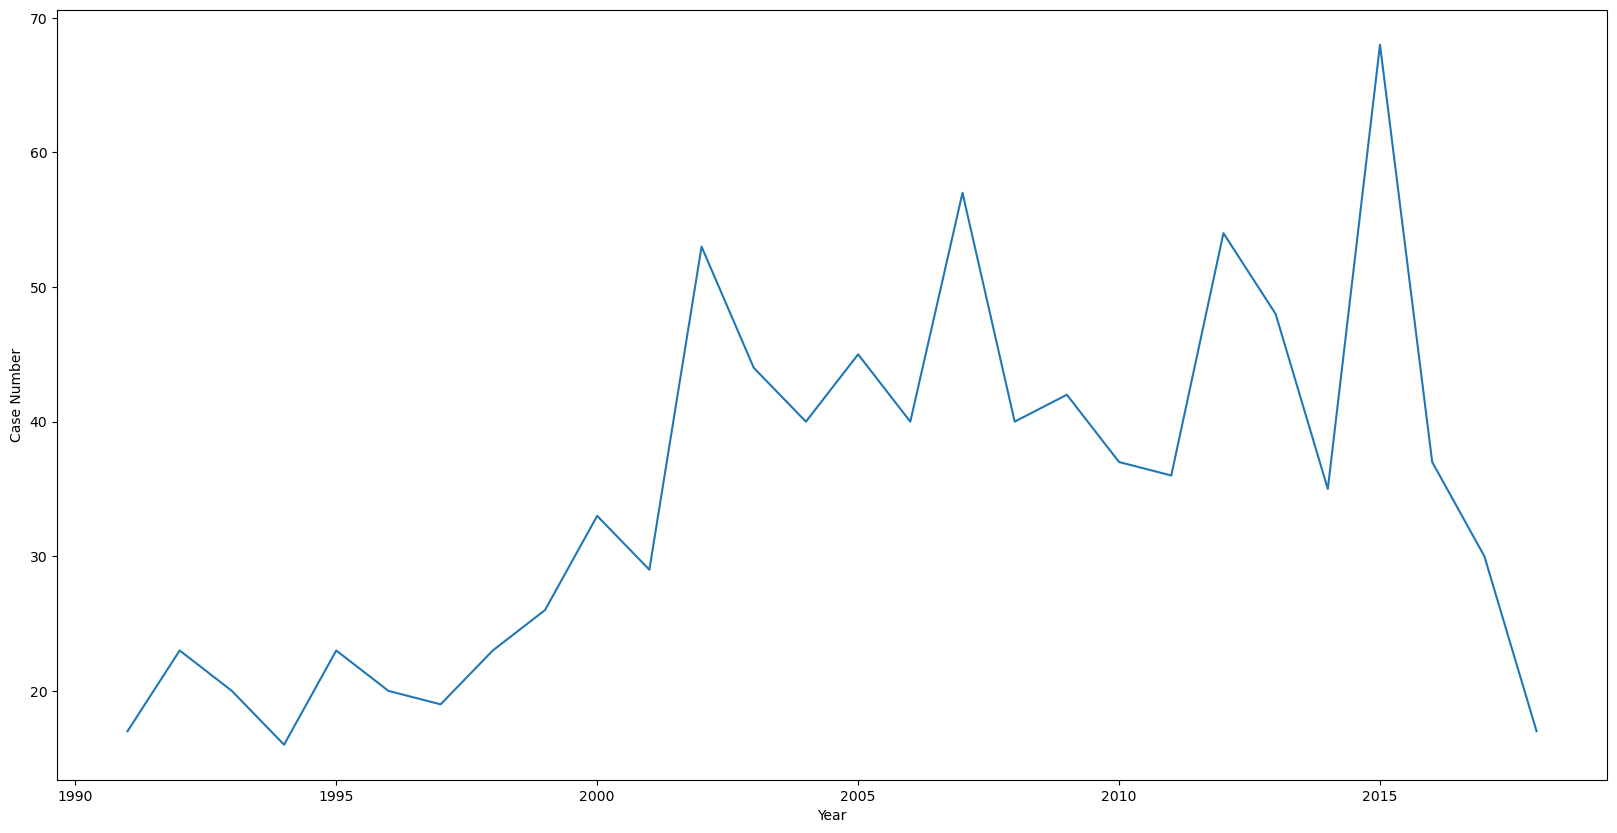

In [27]:
plt.figure(figsize=(20,10))
sns.lineplot(data=año, x='Year', y='Case Number')